##Importing Libraries

In [ ]:
pip install mpl-finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
import pandas_datareader.data as web
import warnings
warnings.filterwarnings('ignore')

In [ ]:

from math import sqrt
import timeit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter


##Loading the Dataset

In [ ]:
#Loading Dataset
Data=pd.read_excel("/content/Data.xlsx")

In [ ]:
Data.shape

(2518, 8)

In [ ]:
Data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
0,2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200,Apple
1,2018-04-09,42.470001,43.272499,42.462502,42.512501,40.528065,116070800,Apple
2,2018-04-10,43.250000,43.500000,42.882500,43.312500,41.290710,113634400,Apple
3,2018-04-11,43.057499,43.480000,42.924999,43.110001,41.097672,89726400,Apple
4,2018-04-12,43.352501,43.750000,43.259998,43.535000,41.502827,91557200,Apple


In [ ]:
Data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Company_Name
2513,2023-03-30,284.230011,284.459991,281.480011,284.049988,284.049988,25053400,Microsoft
2514,2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300,Microsoft
2515,2023-04-03,286.519989,288.269989,283.950012,287.230011,287.230011,24883300,Microsoft
2516,2023-04-04,287.230011,290.450012,285.670013,287.179993,287.179993,25824300,Microsoft
2517,2023-04-05,285.850006,287.149994,282.920013,284.339996,284.339996,22028700,Microsoft


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2518 non-null   datetime64[ns]
 1   Open          2518 non-null   float64       
 2   High          2518 non-null   float64       
 3   Low           2518 non-null   float64       
 4   Close         2518 non-null   float64       
 5   Adj Close     2518 non-null   float64       
 6   Volume        2518 non-null   int64         
 7   Company_Name  2518 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 157.5+ KB


In [ ]:
Data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,152.889074,154.595639,151.171906,152.965004,150.326759,7.140523e+07
std,77.936514,78.739425,77.061783,77.939910,77.596140,5.711427e+07
min,35.994999,36.430000,35.500000,35.547501,34.257286,8.989200e+06
25%,99.292502,100.087502,97.932503,98.974998,94.976103,2.703315e+07
50%,140.389999,142.305000,138.709999,140.620002,138.550179,5.663645e+07
75%,213.100006,214.959999,210.352501,212.785000,208.003330,9.766228e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,4.265100e+08


In [ ]:
Data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Company_Name    0
dtype: int64

In [ ]:
Data.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Company_Name            object
dtype: object

##EDA

**We have took Two Companies data for Stock Analysis namely:**
**Apple**
 **&**
**Microsoft**

**Here we will perform EDA on both the companies individually & try to gain some useful insights.**

In [ ]:
Data['Company_Name'].unique()

array(['Apple', 'Microsoft'], dtype=object)

In [ ]:
Apple = Data.loc[Data['Company_Name']=='Apple']

In [ ]:
Microsoft = Data.loc[Data['Company_Name']=='Microsoft']

In [ ]:
Data.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
Apple.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)
Microsoft.rename(columns = {'Adj Close':'Adj_Close'}, inplace = True)

In [ ]:
Apple.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name
0,2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200,Apple
1,2018-04-09,42.470001,43.272499,42.462502,42.512501,40.528065,116070800,Apple
2,2018-04-10,43.250000,43.500000,42.882500,43.312500,41.290710,113634400,Apple
3,2018-04-11,43.057499,43.480000,42.924999,43.110001,41.097672,89726400,Apple
4,2018-04-12,43.352501,43.750000,43.259998,43.535000,41.502827,91557200,Apple


In [ ]:
Apple.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name
1254,2023-03-30,161.529999,162.470001,161.270004,162.360001,162.360001,49501700,Apple
1255,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700,Apple
1256,2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200,Apple
1257,2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,Apple
1258,2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51457200,Apple


In [ ]:
Apple.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,103.437393,104.704408,102.245433,103.532089,102.209854,1.126731e+08
std,45.728979,46.318396,45.152420,45.760726,46.083303,5.434851e+07
min,35.994999,36.430000,35.500000,35.547501,34.257286,3.519590e+07
25%,54.202501,54.913750,53.571249,54.057501,51.998209,7.646280e+07
50%,116.199997,117.589996,114.540001,115.970001,114.232452,9.765440e+07
75%,145.714996,147.420006,144.250000,145.994996,145.138329,1.311058e+08
max,182.630005,182.940002,179.119995,182.009995,180.683853,4.265100e+08


In [ ]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Adj_Close     1259 non-null   float64       
 6   Volume        1259 non-null   int64         
 7   Company_Name  1259 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 88.5+ KB


In [ ]:
Microsoft.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name
1259,2018-04-06,91.489998,92.459999,89.480003,90.230003,85.156792,38026000,Microsoft
1260,2018-04-09,91.040001,93.169998,90.620003,90.769997,85.666435,31533900,Microsoft
1261,2018-04-10,92.389999,93.279999,91.639999,92.879997,87.657791,26812000,Microsoft
1262,2018-04-11,92.010002,93.290001,91.480003,91.860001,86.695129,24872100,Microsoft
1263,2018-04-12,92.430000,94.160004,92.430000,93.580002,88.318436,26758900,Microsoft


In [ ]:
Microsoft.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name
2513,2023-03-30,284.230011,284.459991,281.480011,284.049988,284.049988,25053400,Microsoft
2514,2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300,Microsoft
2515,2023-04-03,286.519989,288.269989,283.950012,287.230011,287.230011,24883300,Microsoft
2516,2023-04-04,287.230011,290.450012,285.670013,287.179993,287.179993,25824300,Microsoft
2517,2023-04-05,285.850006,287.149994,282.920013,284.339996,284.339996,22028700,Microsoft


In [ ]:
Microsoft.describe()

,Open,High,Low,Close,Adj_Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,202.340755,204.486871,200.098380,202.397919,198.443664,3.013738e+07
std,71.882292,72.643662,71.074686,71.895290,72.727459,1.281150e+07
min,91.040001,92.459999,89.480003,90.230003,85.156792,8.989200e+06
25%,135.690002,136.525002,133.635002,135.504998,130.752532,2.216180e+07
50%,213.100006,215.000000,210.360001,212.830002,208.010681,2.703290e+07
75%,259.505005,261.764999,256.464996,259.599991,256.929276,3.407135e+07
max,344.619995,349.670013,342.200012,343.109985,339.075562,1.112421e+08


In [ ]:
Microsoft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1259 entries, 1259 to 2517
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Adj_Close     1259 non-null   float64       
 6   Volume        1259 non-null   int64         
 7   Company_Name  1259 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 88.5+ KB


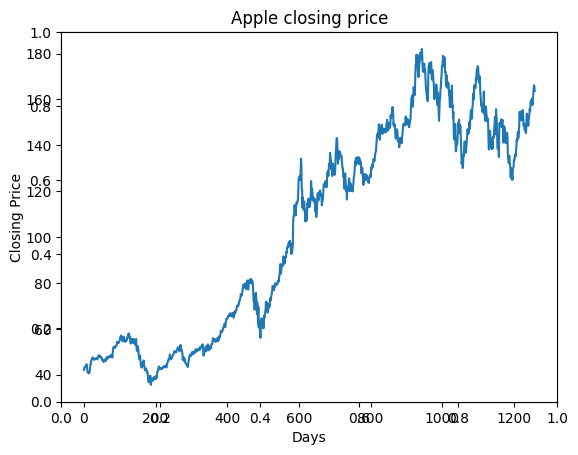

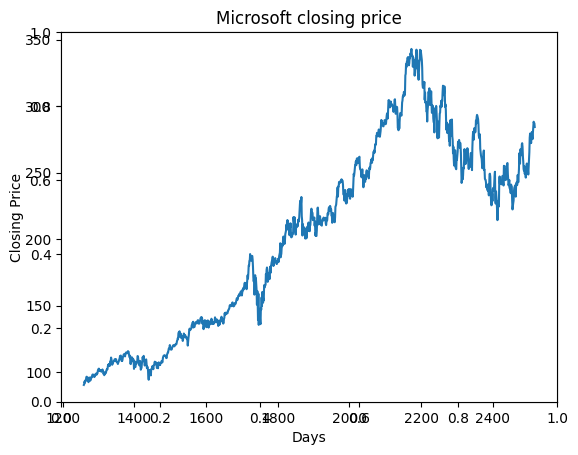

In [ ]:
#Time Series Plot
PLOTS=Data['Company_Name'].unique()
for Company_Name in PLOTS:
    plt.figure()
    plt.xlabel('Days')
    plt.ylabel('Closing Price')
    Data_company = Data[Data['Company_Name']== Company_Name]
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.plot(Data_company['Close'])
    plt.title(f'{Company_Name} closing price')
    plt.show()




### **This line plot represents monthly closing price of stocks from year 2018 to 2023.It also shows increase in closing price of stocks over the time.**


###**As the line is not a straight, there are peaks and valleys which indicates that some factors that are affecting closing price of the stocks.**

###**The peaks represent the highest values of data being plotted & the valleys represent the lowest values.**

### **Overall Performance:** Both Apple and Microsoft have performed well over the past five years, and both companies have seen significant growth in their stock market value. However, there have been times when one works better than the other.


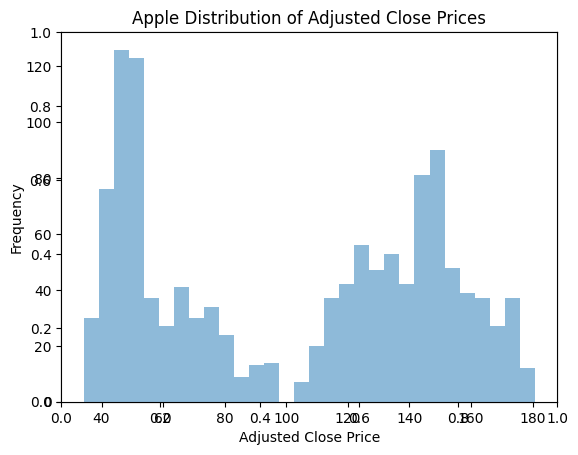

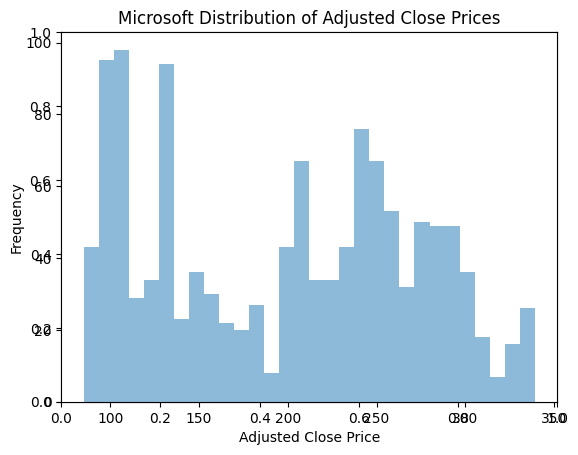

In [ ]:
#Histogram Plot
for Company_Name in PLOTS:
    plt.figure()
    plt.xlabel('Adjusted Close Price')
    plt.ylabel('Frequency')
    plt.title(f'{Company_Name} Distribution of Adjusted Close Prices')
    Data_company = Data[Data['Company_Name']== Company_Name]
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.hist(Data_company['Adj_Close'], bins=30, alpha=0.5)
    plt.show()




### **Trends:** We might expect to see that both Apple and Microsoft experienced growth in their adjusted close prices over the five-year period, with some ups and downs along the way. It's possible that one company outperformed the other for certain stretches of time.


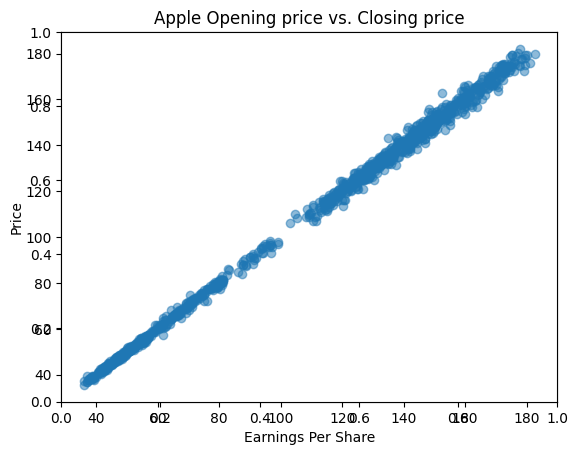

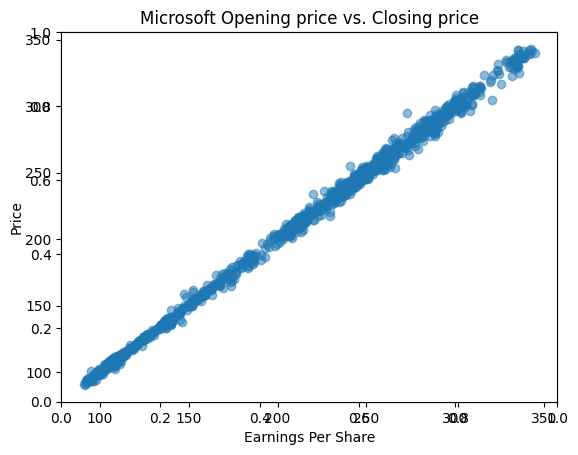

In [ ]:
#Scatter Plot
for Company_Name in PLOTS:
    plt.figure()
    plt.xlabel('Earnings Per Share')
    plt.ylabel('Price')
    plt.title(f'{Company_Name} Opening price vs. Closing price')
    Data_company = Data[Data['Company_Name']== Company_Name]
    ax = plt.axes()
    ax.set_facecolor("white")
    plt.scatter(Data_company['Open'],Data_company['Close'], alpha=0.5)
    plt.show()


### **Insight:** Overall, we might see a trend of both companies experiencing growth in their opening and closing prices over the five-year period, with some ups and downs along the way. However, there may be periods where prices experienced significant fluctuations or even declines.

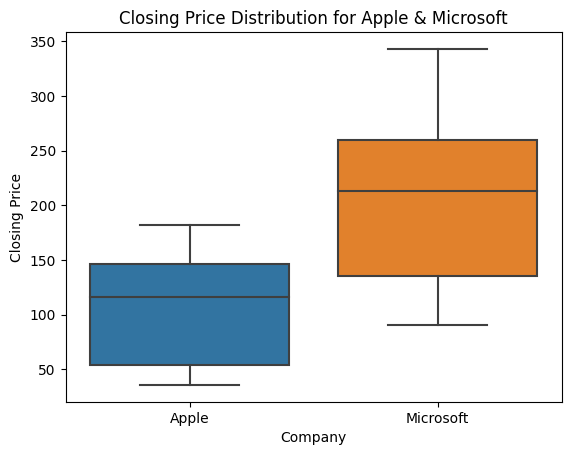

In [ ]:
#Box Plot
sns.boxplot(x=Data['Company_Name'], y=Data['Close'])
plt.title('Closing Price Distribution for Apple & Microsoft')
plt.xlabel('Company')
plt.ylabel('Closing Price')
plt.show()




### **Insight:** The box plot can help us identify the median and quartiles of the closing prices for each company, which can give us an idea of the central tendency of their performance over the five-year period. For example, if we see that the median closing price for Apple is consistently higher than that of Microsoft, it could suggest that Apple performed better overall.

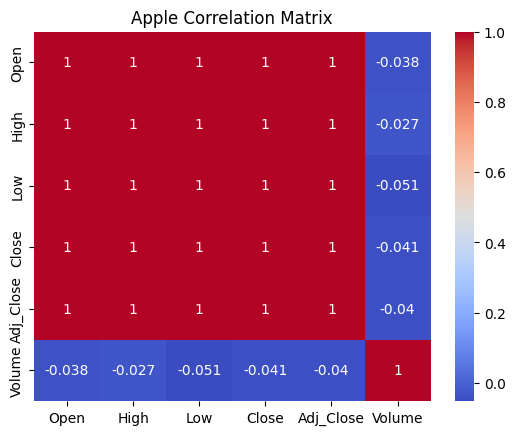

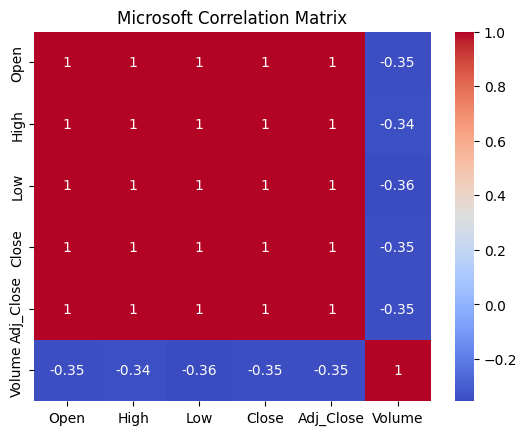

In [ ]:
#Heat Map
for Company_Name in PLOTS:
    plt.figure()
    plt.title(f'{Company_Name} Correlation Matrix')
    Data_company_corr = Data_company.corr()
    Data_company = Data[Data['Company_Name']== Company_Name]
    sns.heatmap(Data_company_corr, cmap='coolwarm', annot=True)
    plt.show()


In [ ]:
Correlation=Data.pivot(index='Date', columns='Company_Name', values='Close')
Correlation.head()

Company_Name,Apple,Microsoft
Date,,
2018-04-06,42.095001,90.230003
2018-04-09,42.512501,90.769997
2018-04-10,43.312500,92.879997
2018-04-11,43.110001,91.860001
2018-04-12,43.535000,93.580002


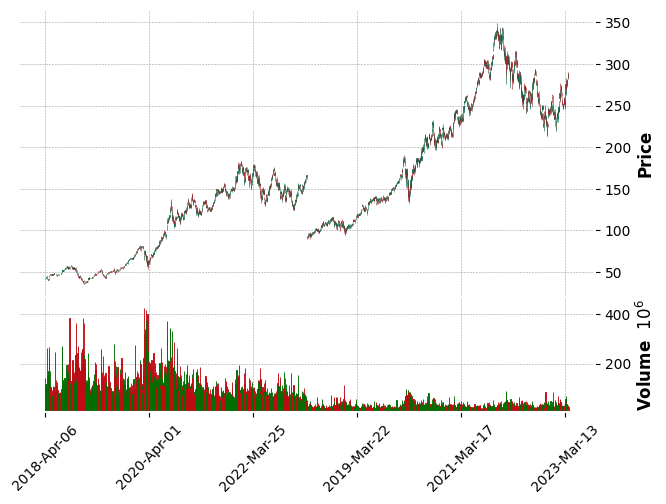

In [ ]:
#Candlestick Chart
df = pd.read_excel('/content/Data.xlsx', index_col='Date', parse_dates=True)
mpf.plot(df, type='candle', style='charles', volume=True)

**Volume measures the number of shares of a particular stock that are traded during a given period of time.**



### we can consider any external factors that may have influenced the share price and volume over time, such as changes in company leadership, economic trends, or industry news. If we see a sharp increase or decrease in share price or volume during a specific time period, we can investigate potential market factors that may have contributed to this movement.



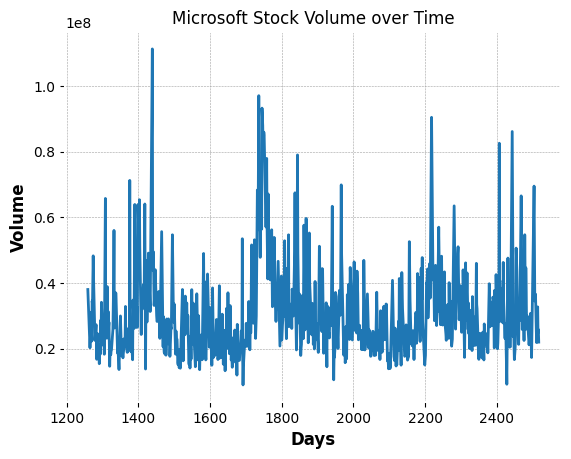

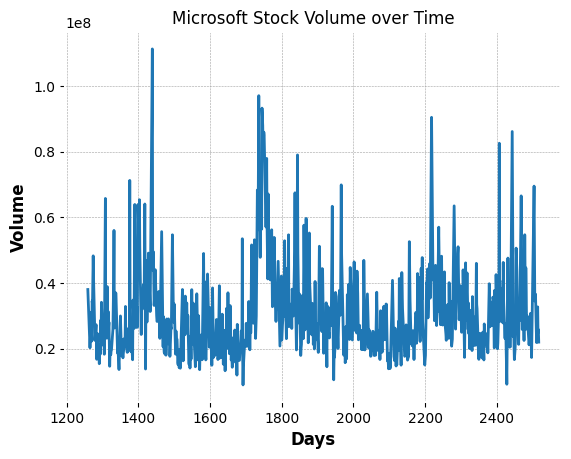

In [ ]:
#Plotting Volume
for Company_name in PLOTS:
    plt.figure()
    Data_company = Data[Data['Company_Name']== Company_Name]
    plt.plot(Data_company['Volume'])
    plt.title(f'{Company_Name} Stock Volume over Time')
    plt.xlabel('Days')
    plt.ylabel('Volume')
    plt.show()

### We can analyze any recurring trading patterns that may have emerged over time. For example, we might see that there is a spike in trading volume followed by a rapid increase in share price, or that there is a sudden drop in price followed by a sharp increase in trading volume.


##Moving Averages

**Moving average is a calculation of the average value of a set of data over a specific period of time, where the period of time is "moving" or "rolling" based on a specific time interval.**

In [ ]:
Microsoft.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name
2513,2023-03-30,284.230011,284.459991,281.480011,284.049988,284.049988,25053400,Microsoft
2514,2023-03-31,283.730011,289.269989,283.000000,288.299988,288.299988,32740300,Microsoft
2515,2023-04-03,286.519989,288.269989,283.950012,287.230011,287.230011,24883300,Microsoft
2516,2023-04-04,287.230011,290.450012,285.670013,287.179993,287.179993,25824300,Microsoft
2517,2023-04-05,285.850006,287.149994,282.920013,284.339996,284.339996,22028700,Microsoft


In [ ]:
# Define the date range
start_date = '2018-04-06'
end_date = '2023-04-05'

# Calculate the rolling means for different window sizes
Data['ma10'] = Data['Close'].rolling(window=10).mean()
Data['ma30'] = Data['Close'].rolling(window=30).mean()
Data['ma60'] = Data['Close'].rolling(window=60).mean()
Data.sample(10)

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name,ma10,ma30,ma60
2151,2021-10-20,309.209991,309.700012,306.109985,307.410004,303.240601,16537100,Microsoft,300.301004,296.231333,295.399833
335,2019-08-06,49.077499,49.517502,48.509998,49.250000,47.849556,143299200,Apple,51.443000,50.921500,48.922458
1673,2019-11-26,151.360001,152.419998,151.320007,152.029999,147.431625,24620100,Microsoft,149.801997,144.781000,141.445834
1576,2019-07-11,138.199997,139.220001,137.869995,138.399994,133.314819,22327900,Microsoft,136.456002,132.858001,129.591334
62,2018-07-05,46.314999,46.602501,46.070000,46.349998,44.356823,66416800,Apple,46.206250,47.040916,45.728000
382,2019-10-11,58.237499,59.410000,58.077499,59.052502,57.591305,166795600,Apple,56.503500,55.040083,53.244667
1592,2019-08-02,138.089996,138.320007,135.259995,136.899994,131.869904,30791600,Microsoft,139.257999,137.447999,132.842500
2231,2022-02-14,293.769989,296.760010,291.350006,295.000000,291.531250,36359500,Microsoft,303.855002,307.113001,320.531000
1523,2019-04-25,130.059998,131.369995,128.830002,129.149994,123.945862,38033900,Microsoft,123.160000,119.871667,114.461333
1123,2022-09-21,157.339996,158.740005,153.600006,153.720001,153.231461,101696800,Apple,155.257997,162.220000,157.033333


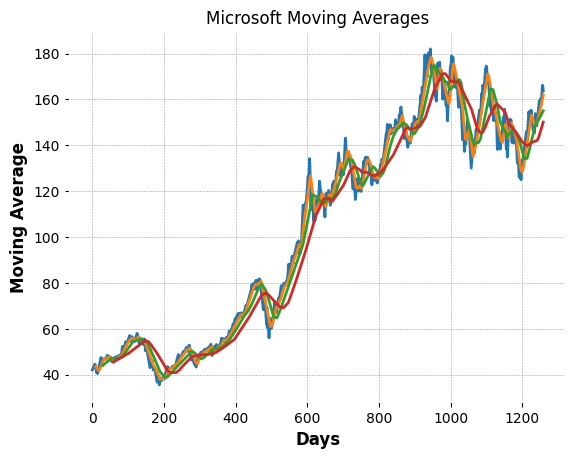

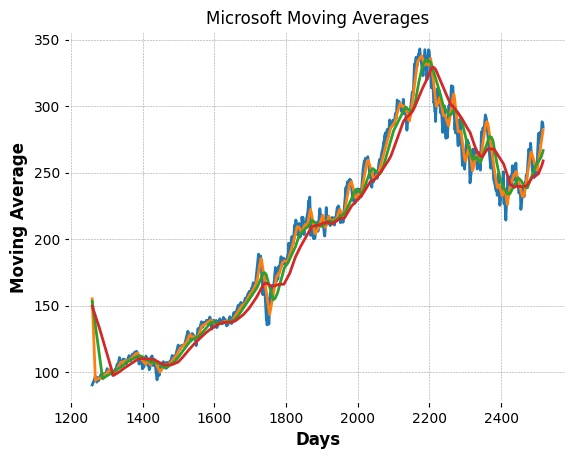

In [ ]:
#Moving Average Plotting
for Company_Name in PLOTS:
    plt.figure()
    Data_company = Data[Data['Company_Name']== Company_Name]
    plt.plot(Data_company[['Close','ma10','ma30','ma60']])
    plt.title(f'{Company_name} Moving Averages')
    plt.xlabel('Days')
    plt.ylabel('Moving Average')
    plt.show()

### **Trends over time:** We can observe the general trend in trading volume over time. For example, we might see that there is a general increase or decrease in trading volume over the years, which could be related to macroeconomic factors, company performance, or other market trends.

##On Average Stock Finding Daily Returns

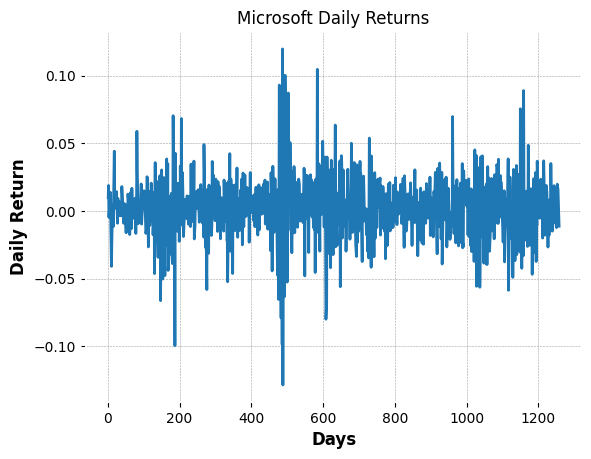

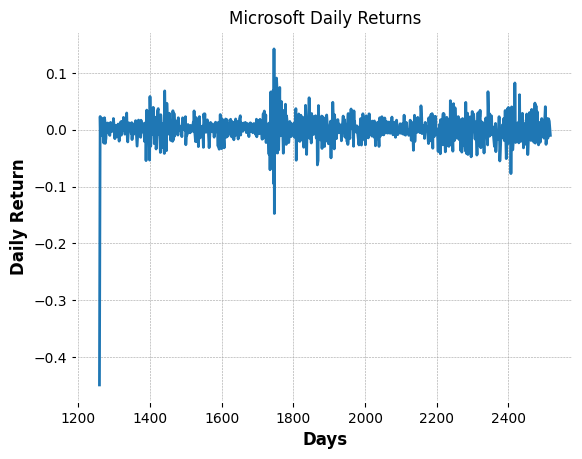

In [ ]:
Data['Daily_Return']=Data['Close'].pct_change()
for Company_Name in PLOTS:
    plt.figure()
    Data_company = Data[Data['Company_Name']== Company_Name]
    plt.plot(Data_company['Daily_Return'])
    plt.title(f'{Company_name} Daily Returns')
    plt.xlabel('Days')
    plt.ylabel('Daily Return')
    plt.show()

### We can analyze the volatility of daily returns over time. If we see that there are frequent and large fluctuations in daily returns, it could suggest that the market is highly volatile and potentially risky.

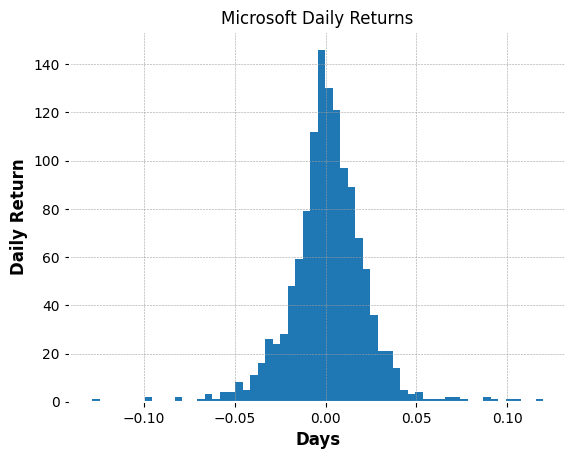

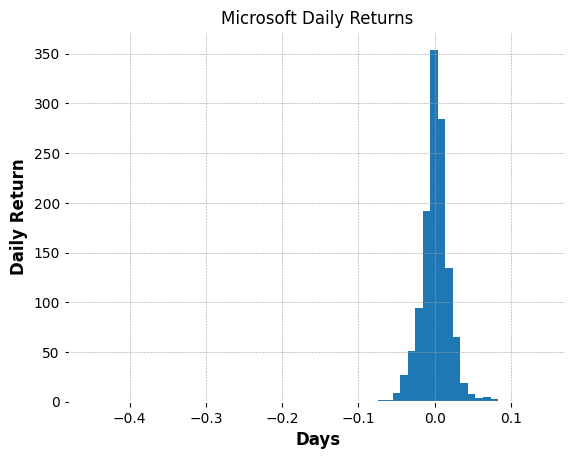

In [ ]:
for Company_Name in PLOTS:
    plt.figure()
    Data_company = Data[Data['Company_Name']== Company_Name]
    Data_company['Daily_Return'].hist(bins=60)
    plt.title(f'{Company_name} Daily Returns')
    plt.xlabel('Days')
    plt.ylabel('Daily Return')
    plt.show()

### We can compare the correlation between the daily returns of Apple and Microsoft over time. If we see that the daily returns of the two companies are highly correlated, it could suggest that the market views the two companies similarly or that they operate in similar industries.


In [ ]:
Returns =Correlation.pct_change()
Returns=Returns.iloc[1:]
Returns.head()

Company_Name,Apple,Microsoft
Date,,
2018-04-09,0.009918,0.005985
2018-04-10,0.018818,0.023246
2018-04-11,-0.004675,-0.010982
2018-04-12,0.009858,0.018724
2018-04-13,0.003388,-0.005343


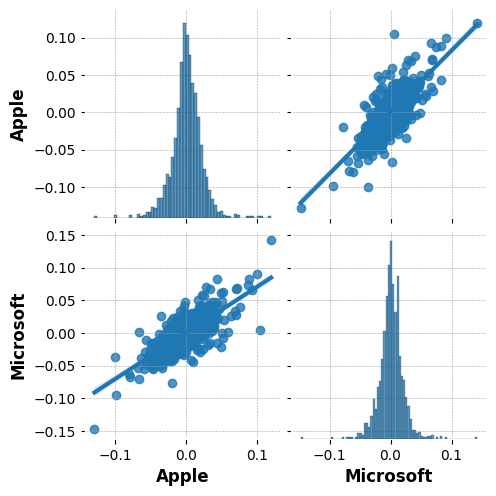

In [ ]:
sns.pairplot(Returns, kind='reg')

**Here we obtained relationships on daily returns for apple & microsoft stocks.**

**Following are some individual comparisons:**

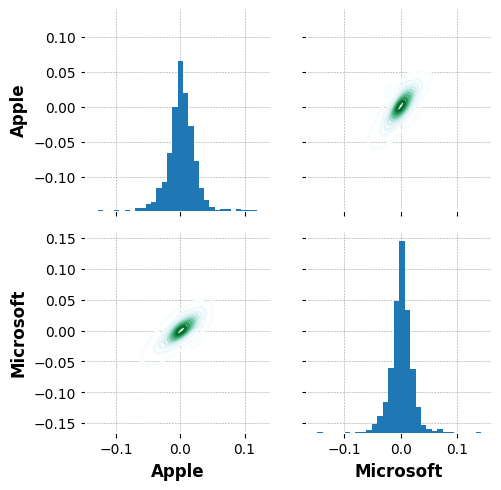

In [ ]:
plot = sns.PairGrid(Returns)
plot.map_upper(sns.kdeplot,cmap='BuGn')
plot.map_lower(sns.kdeplot,cmap='BuGn' )
plot.map_diag(plt.hist, bins=30)

### **Overall Performance:** Both Apple and Microsoft have performed well over the past five years, and both companies have seen significant growth in their stock market value. However, there have been times when one works better than the other.

###**Performance difference:** Apple's stock price has generally outperformed Microsoft's over the past five years. However, there have been times when Microsoft has outperformed Apple, such as in early 2020 when Microsoft’s stock price surged due to increased demand for its cloud computing services.

###**Timing:** There may be periods in the data, such as a tendency for stock prices to rise in the first half of the year. This can be due to a variety of factors such as new product releases or when earnings are reported.

###**Outliers:** There may be some outliers in the data, such as months where the stock price for each company is significantly higher or lower than the rest of the data. This can be due to a variety of factors,such as major product releases or unexpected news events.

In [ ]:
Data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,Company_Name,ma10,ma30,ma60,Daily_Return
0,2018-04-06,42.742500,43.119999,42.049999,42.095001,40.130054,140021200,Apple,NaN,NaN,NaN,NaN
1,2018-04-09,42.470001,43.272499,42.462502,42.512501,40.528065,116070800,Apple,NaN,NaN,NaN,0.009918
2,2018-04-10,43.250000,43.500000,42.882500,43.312500,41.290710,113634400,Apple,NaN,NaN,NaN,0.018818
3,2018-04-11,43.057499,43.480000,42.924999,43.110001,41.097672,89726400,Apple,NaN,NaN,NaN,-0.004675
4,2018-04-12,43.352501,43.750000,43.259998,43.535000,41.502827,91557200,Apple,NaN,NaN,NaN,0.009858


In [ ]:
col = ['Date','Open','High','Low','Adj_Close','Volume','Daily_Return','ma10','ma30','ma60','Company_Name','Close']
Data = Data[col]
Data.head()

,Date,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60,Company_Name,Close
0,2018-04-06,42.742500,43.119999,42.049999,40.130054,140021200,NaN,NaN,NaN,NaN,Apple,42.095001
1,2018-04-09,42.470001,43.272499,42.462502,40.528065,116070800,0.009918,NaN,NaN,NaN,Apple,42.512501
2,2018-04-10,43.250000,43.500000,42.882500,41.290710,113634400,0.018818,NaN,NaN,NaN,Apple,43.312500
3,2018-04-11,43.057499,43.480000,42.924999,41.097672,89726400,-0.004675,NaN,NaN,NaN,Apple,43.110001
4,2018-04-12,43.352501,43.750000,43.259998,41.502827,91557200,0.009858,NaN,NaN,NaN,Apple,43.535000


In [ ]:
Data.shape

(2518, 12)

In [ ]:
Data1=Data.dropna()
Data1.head()

,Date,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60,Company_Name,Close
59,2018-06-29,46.572498,46.797501,45.727501,44.287441,90950800,-0.002102,46.317000,47.079250,45.541250,Apple,46.277500
60,2018-07-02,45.955002,46.825001,45.855000,44.782681,70925200,0.011182,46.278000,47.086500,45.619583,Apple,46.794998
61,2018-07-03,46.947498,46.987499,45.884998,44.002728,55819200,-0.017416,46.233750,47.055583,45.677375,Apple,45.980000
62,2018-07-05,46.314999,46.602501,46.070000,44.356823,66416800,0.008047,46.206250,47.040916,45.728000,Apple,46.349998
63,2018-07-06,46.355000,47.107498,46.299999,44.971695,69940800,0.013862,46.268999,47.037666,45.792708,Apple,46.992500


In [ ]:
Data1.drop_duplicates(keep=False,inplace=True)

In [ ]:
Data1.describe()

,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60,Close
count,2459.000000,2459.000000,2459.000000,2459.000000,2.459000e+03,2459.000000,2459.000000,2459.000000,2459.000000,2459.000000
mean,155.465590,157.204636,153.714685,152.889828,7.041396e+07,0.001006,155.106825,154.201596,152.906390,155.542774
std,77.047679,77.833025,76.189740,76.714321,5.697130e+07,0.022330,76.870954,76.612250,76.366609,77.049386
min,35.994999,36.430000,35.500000,34.257286,8.989200e+06,-0.449011,37.663500,38.696917,40.775083,35.547501
25%,103.655003,104.924999,102.084999,98.786350,2.673090e+07,-0.008835,104.382001,103.954334,105.139917,103.710003
50%,142.539993,144.339996,140.410004,140.994781,5.414710e+07,0.001233,142.842003,141.995666,141.273166,142.639999
75%,214.029999,216.230004,212.114998,209.686378,9.622300e+07,0.011992,213.788001,212.891166,211.562250,214.230003
max,344.619995,349.670013,342.200012,339.075562,4.265100e+08,0.142169,338.364996,334.915998,329.393001,343.109985


In [ ]:
Data1.shape

(2459, 12)

#TSA

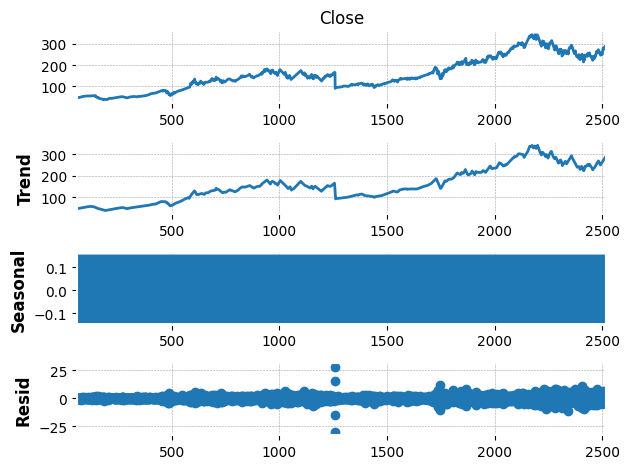

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(Data1.Close,period=5)
decompose.plot()
plt.show()

### By decomposing the time series into its trend, seasonal, and residual components, you can gain insights into how each component contributes to the overall behavior of the series. you may be able to identify patterns or trends in the data that are not immediately apparent from a simple visual inspection of the raw data.

In [ ]:
Data1.head()

,Date,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60,Company_Name,Close
59,2018-06-29,46.572498,46.797501,45.727501,44.287441,90950800,-0.002102,46.317000,47.079250,45.541250,Apple,46.277500
60,2018-07-02,45.955002,46.825001,45.855000,44.782681,70925200,0.011182,46.278000,47.086500,45.619583,Apple,46.794998
61,2018-07-03,46.947498,46.987499,45.884998,44.002728,55819200,-0.017416,46.233750,47.055583,45.677375,Apple,45.980000
62,2018-07-05,46.314999,46.602501,46.070000,44.356823,66416800,0.008047,46.206250,47.040916,45.728000,Apple,46.349998
63,2018-07-06,46.355000,47.107498,46.299999,44.971695,69940800,0.013862,46.268999,47.037666,45.792708,Apple,46.992500


# Feature selection on train dataset using ExtraTreesClassifier

In [ ]:
x1 = Data1.iloc[:,1:10]
y1 = Data1.iloc[:,10]

In [ ]:
x1

,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60
59,46.572498,46.797501,45.727501,44.287441,90950800,-0.002102,46.317000,47.079250,45.541250
60,45.955002,46.825001,45.855000,44.782681,70925200,0.011182,46.278000,47.086500,45.619583
61,46.947498,46.987499,45.884998,44.002728,55819200,-0.017416,46.233750,47.055583,45.677375
62,46.314999,46.602501,46.070000,44.356823,66416800,0.008047,46.206250,47.040916,45.728000
63,46.355000,47.107498,46.299999,44.971695,69940800,0.013862,46.268999,47.037666,45.792708
...,...,...,...,...,...,...,...,...,...
2513,284.230011,284.459991,281.480011,284.049988,25053400,0.012620,277.213004,262.491335,254.784501
2514,283.730011,289.269989,283.000000,288.299988,32740300,0.014962,278.100003,263.363001,255.771168
2515,286.519989,288.269989,283.950012,287.230011,24883300,-0.003711,279.600003,264.335335,256.853168
2516,287.230011,290.450012,285.670013,287.179993,25824300,-0.000174,280.940003,265.485668,257.890668


In [ ]:
y1

59          Apple
60          Apple
61          Apple
62          Apple
63          Apple
          ...    
2513    Microsoft
2514    Microsoft
2515    Microsoft
2516    Microsoft
2517    Microsoft
Name: Company_Name, Length: 2459, dtype: object

In [ ]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y1)

'binary'

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x_train,y_train)
print(model.feature_importances_)

[0.11273153 0.10330748 0.13057118 0.12009131 0.23754912 0.01080579
 0.0823031  0.12798217 0.07465831]


In [ ]:
Data1.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Return',
       'ma10', 'ma30', 'ma60', 'Company_Name', 'Close'],
      dtype='object')

In [ ]:
cols1=['Open', 'High', 'Low', 'Adj_Close', 'Volume', 'Daily_Return', 'ma10',
       'ma30', 'ma60', ]
feature_imp=pd.Series(model.feature_importances_,index=cols1).sort_values(ascending=False)
feature_imp

Volume          0.237549
Low             0.130571
ma30            0.127982
Adj_Close       0.120091
Open            0.112732
High            0.103307
ma10            0.082303
ma60            0.074658
Daily_Return    0.010806
dtype: float64

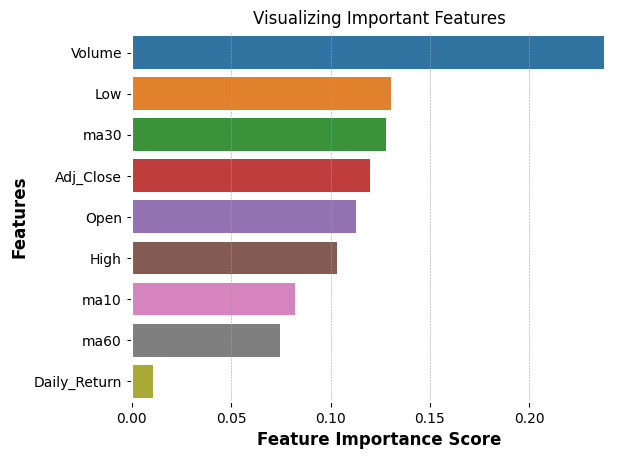

In [ ]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### By examining the bar plot, you can gain insights into which features are the most important in making predictions with the model. The highest bars in the plot correspond to the most important features as we see with respect to volume, while the lowest bars correspond to the least important features(DayOfWeek, Daily Returns , Month).

## Feature selection on train dataset using RandomForestRegressor

In [ ]:
x2 = Data1.iloc[:,1:10]
y2 = Data1.iloc[:,-1]


In [ ]:
x2

,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60
59,46.572498,46.797501,45.727501,44.287441,90950800,-0.002102,46.317000,47.079250,45.541250
60,45.955002,46.825001,45.855000,44.782681,70925200,0.011182,46.278000,47.086500,45.619583
61,46.947498,46.987499,45.884998,44.002728,55819200,-0.017416,46.233750,47.055583,45.677375
62,46.314999,46.602501,46.070000,44.356823,66416800,0.008047,46.206250,47.040916,45.728000
63,46.355000,47.107498,46.299999,44.971695,69940800,0.013862,46.268999,47.037666,45.792708
...,...,...,...,...,...,...,...,...,...
2513,284.230011,284.459991,281.480011,284.049988,25053400,0.012620,277.213004,262.491335,254.784501
2514,283.730011,289.269989,283.000000,288.299988,32740300,0.014962,278.100003,263.363001,255.771168
2515,286.519989,288.269989,283.950012,287.230011,24883300,-0.003711,279.600003,264.335335,256.853168
2516,287.230011,290.450012,285.670013,287.179993,25824300,-0.000174,280.940003,265.485668,257.890668


In [ ]:
y2

59       46.277500
60       46.794998
61       45.980000
62       46.349998
63       46.992500
           ...    
2513    284.049988
2514    288.299988
2515    287.230011
2516    287.179993
2517    284.339996
Name: Close, Length: 2459, dtype: float64

In [ ]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(y2)

'continuous'

Feature 1: 0.02137692750886043
Feature 2: 0.18698342674094257
Feature 3: 0.23746270385463342
Feature 4: 0.553880286177724
Feature 5: 1.1609169104866349e-05
Feature 6: 2.1848296115494106e-05
Feature 7: 0.00015289215513070284
Feature 8: 9.6653093788295e-05
Feature 9: 1.3653003700102739e-05


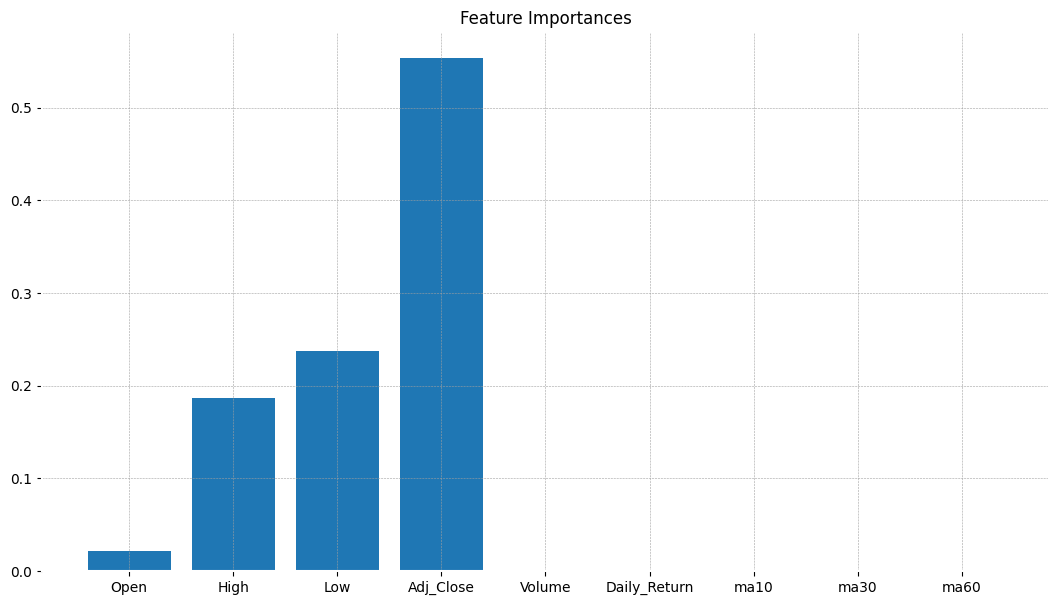

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming you have already loaded your data into the x and y variables
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)

model = RandomForestRegressor(n_estimators=50)

# Train the model on the training data
model.fit(x_train, y_train)

# Use the trained model to make predictions on the testing data
y_pred = model.predict(x_test)
y_pred
# Get the feature importances
importances = model.feature_importances_

# Print the feature importances
for i, importance in enumerate(importances):
    print("Feature {}: {}".format(i+1, importance))

# Plot the feature importances
plt.figure(figsize=(13,7))
plt.bar(range(x2.shape[1]), importances)
plt.xticks(range(x2.shape[1]),['Open',	'High',	'Low'	,'Adj_Close',	'Volume',	'Daily_Return',	'ma10',	'ma30',	'ma60'	])
plt.title("Feature Importances")
plt.show()

##Normalization & Standardization

In [ ]:
Data1.head()

,Date,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60,Company_Name,Close
59,2018-06-29,46.572498,46.797501,45.727501,44.287441,90950800,-0.002102,46.317000,47.079250,45.541250,Apple,46.277500
60,2018-07-02,45.955002,46.825001,45.855000,44.782681,70925200,0.011182,46.278000,47.086500,45.619583,Apple,46.794998
61,2018-07-03,46.947498,46.987499,45.884998,44.002728,55819200,-0.017416,46.233750,47.055583,45.677375,Apple,45.980000
62,2018-07-05,46.314999,46.602501,46.070000,44.356823,66416800,0.008047,46.206250,47.040916,45.728000,Apple,46.349998
63,2018-07-06,46.355000,47.107498,46.299999,44.971695,69940800,0.013862,46.268999,47.037666,45.792708,Apple,46.992500


In [ ]:
#independent & dependent variables
X = Data1.iloc[:,1:10]
Y = Data1.iloc[:, [0, 10, 11]]


In [ ]:
X

,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60
59,46.572498,46.797501,45.727501,44.287441,90950800,-0.002102,46.317000,47.079250,45.541250
60,45.955002,46.825001,45.855000,44.782681,70925200,0.011182,46.278000,47.086500,45.619583
61,46.947498,46.987499,45.884998,44.002728,55819200,-0.017416,46.233750,47.055583,45.677375
62,46.314999,46.602501,46.070000,44.356823,66416800,0.008047,46.206250,47.040916,45.728000
63,46.355000,47.107498,46.299999,44.971695,69940800,0.013862,46.268999,47.037666,45.792708
...,...,...,...,...,...,...,...,...,...
2513,284.230011,284.459991,281.480011,284.049988,25053400,0.012620,277.213004,262.491335,254.784501
2514,283.730011,289.269989,283.000000,288.299988,32740300,0.014962,278.100003,263.363001,255.771168
2515,286.519989,288.269989,283.950012,287.230011,24883300,-0.003711,279.600003,264.335335,256.853168
2516,287.230011,290.450012,285.670013,287.179993,25824300,-0.000174,280.940003,265.485668,257.890668


In [ ]:
Y

,Date,Company_Name,Close
59,2018-06-29,Apple,46.277500
60,2018-07-02,Apple,46.794998
61,2018-07-03,Apple,45.980000
62,2018-07-05,Apple,46.349998
63,2018-07-06,Apple,46.992500
...,...,...,...
2513,2023-03-30,Microsoft,284.049988
2514,2023-03-31,Microsoft,288.299988
2515,2023-04-03,Microsoft,287.230011
2516,2023-04-04,Microsoft,287.179993


In [ ]:
Data1.shape

(2459, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.41360832, -1.41880122, -1.41763376, ..., -1.41551452,
        -1.39852484, -1.4062033 ],
       [-1.42162442, -1.41844783, -1.41595998, ..., -1.41602197,
        -1.39843019, -1.40517734],
       [-1.40874022, -1.41635963, -1.41556617, ..., -1.41659773,
        -1.39883382, -1.40442042],
       ...,
       [ 1.70129791,  1.68427233,  1.70970286, ...,  1.61983809,
         1.43783976,  1.36143168],
       [ 1.71051514,  1.712287  ,  1.73228269, ...,  1.63727344,
         1.45285782,  1.37502023],
       [ 1.69260045,  1.66987969,  1.69618125, ...,  1.65295223,
         1.46714477,  1.38751078]])

**As the data points are in different scales before moving further we have to make data in one scale**

**Normalizing the data so that data points rescaled & end up in a range of 0 to 1 using min-max scaling technique.**

In [ ]:
X_norm = (X_scaled - X_scaled.min(axis=0))/(X_scaled.max(axis=0)-X_scaled.min(axis=0))
X_norm

array([[0.03427298, 0.03309763, 0.03334692, ..., 0.02877771, 0.02829775,
        0.01651376],
       [0.03227219, 0.03318542, 0.03376263, ..., 0.02864801, 0.02832222,
        0.01678517],
       [0.03548805, 0.03370418, 0.03386044, ..., 0.02850086, 0.02821785,
        0.0169854 ],
       ...,
       [0.81174562, 0.8039841 , 0.810075  , ..., 0.80457366, 0.76172817,
        0.74866483],
       [0.81404622, 0.81094369, 0.81568309, ..., 0.8090299 , 0.76561155,
        0.75225955],
       [0.80957476, 0.80040858, 0.80671667, ..., 0.8130372 , 0.76930589,
        0.7555638 ]])

In [ ]:
# Convert X into a DataFrame
df= pd.DataFrame(X_norm, columns=["Open","High","Low",	"Adj_Close","Volume","Daily_Return","ma10","ma30","ma60"])
df.head()

,Open,High,Low,Adj_Close,Volume,Daily_Return,ma10,ma30,ma60
0,0.034273,0.033098,0.033347,0.032905,0.196305,0.755960,0.028778,0.028298,0.016514
1,0.032272,0.033185,0.033763,0.034530,0.148342,0.778432,0.028648,0.028322,0.016785
2,0.035488,0.033704,0.033860,0.031971,0.112162,0.730056,0.028501,0.028218,0.016985
3,0.033439,0.032475,0.034464,0.033133,0.137544,0.773128,0.028409,0.028168,0.017161
4,0.033568,0.034087,0.035214,0.035150,0.145985,0.782965,0.028618,0.028157,0.017385


In [ ]:
Data2 = df.drop(columns=["Daily_Return"])
Data2.head()

,Open,High,Low,Adj_Close,Volume,ma10,ma30,ma60
0,0.034273,0.033098,0.033347,0.032905,0.196305,0.028778,0.028298,0.016514
1,0.032272,0.033185,0.033763,0.034530,0.148342,0.028648,0.028322,0.016785
2,0.035488,0.033704,0.033860,0.031971,0.112162,0.028501,0.028218,0.016985
3,0.033439,0.032475,0.034464,0.033133,0.137544,0.028409,0.028168,0.017161
4,0.033568,0.034087,0.035214,0.035150,0.145985,0.028618,0.028157,0.017385


In [ ]:
Y = Y.reset_index(drop=True)
df1 = pd.concat([Data2, Y], axis=1, ignore_index=True)
df1


,0,1,2,3,4,5,6,7,8,9,10
0,0.034273,0.033098,0.033347,0.032905,0.196305,0.028778,0.028298,0.016514,2018-06-29,Apple,46.277500
1,0.032272,0.033185,0.033763,0.034530,0.148342,0.028648,0.028322,0.016785,2018-07-02,Apple,46.794998
2,0.035488,0.033704,0.033860,0.031971,0.112162,0.028501,0.028218,0.016985,2018-07-03,Apple,45.980000
3,0.033439,0.032475,0.034464,0.033133,0.137544,0.028409,0.028168,0.017161,2018-07-05,Apple,46.349998
4,0.033568,0.034087,0.035214,0.035150,0.145985,0.028618,0.028157,0.017385,2018-07-06,Apple,46.992500
...,...,...,...,...,...,...,...,...,...,...,...
2454,0.804326,0.791821,0.802022,0.819481,0.038475,0.796636,0.755503,0.741497,2023-03-30,Microsoft,284.049988
2455,0.802706,0.807177,0.806977,0.833423,0.056886,0.799585,0.758446,0.744916,2023-03-31,Microsoft,288.299988
2456,0.811746,0.803984,0.810075,0.829913,0.038068,0.804574,0.761728,0.748665,2023-04-03,Microsoft,287.230011
2457,0.814046,0.810944,0.815683,0.829749,0.040322,0.809030,0.765612,0.752260,2023-04-04,Microsoft,287.179993


In [ ]:
df1.columns = ["Open","High","Low",	"Adj_Close","Volume","ma10","ma30","ma60","Date","Company","Close"]

In [ ]:
df1.head(1200)

,Open,High,Low,Adj_Close,Volume,ma10,ma30,ma60,Date,Company,Close
0,0.034273,0.033098,0.033347,0.032905,0.196305,0.028778,0.028298,0.016514,2018-06-29,Apple,46.277500
1,0.032272,0.033185,0.033763,0.034530,0.148342,0.028648,0.028322,0.016785,2018-07-02,Apple,46.794998
2,0.035488,0.033704,0.033860,0.031971,0.112162,0.028501,0.028218,0.016985,2018-07-03,Apple,45.980000
3,0.033439,0.032475,0.034464,0.033133,0.137544,0.028409,0.028168,0.017161,2018-07-05,Apple,46.349998
4,0.033568,0.034087,0.035214,0.035150,0.145985,0.028618,0.028157,0.017385,2018-07-06,Apple,46.992500
...,...,...,...,...,...,...,...,...,...,...,...
1195,0.406756,0.402375,0.410075,0.420259,0.097031,0.402763,0.386366,0.370253,2023-03-30,Apple,162.360001
1196,0.409704,0.410452,0.412162,0.428592,0.143000,0.406056,0.387626,0.372478,2023-03-31,Apple,164.899994
1197,0.415634,0.414570,0.419693,0.432759,0.114933,0.408972,0.389158,0.374855,2023-04-03,Apple,166.169998
1198,0.423184,0.416326,0.422595,0.430987,0.089311,0.411084,0.391088,0.376934,2023-04-04,Apple,165.630005


Apple--->1259 Rows

##Forecasting Model Building

**Now we are going to get different RMSE scores using different models, this score gives average difference between the predicted traffic values and the actual traffic values in test data.**

**We will compare RMSE value that we will obtained from different models & then will pick the one which has lower value among all.**

In [ ]:
#Train = df1.iloc[0:1850,0:11]
#Test = df1.iloc[1850:,0:11]

In [ ]:
#df2=df1.loc[df1['Company']=='Apple']
#df2.set_index('Date',inplace = True)
#train = df2.loc[:'2018-06-29']['Close']
#test = df2.loc['2022-01-25':]['Close']

In [ ]:
#df2.head()

In [ ]:
#forecast_Value=900
#train = df2.Close[:forecast_Value]
#test = df2.Close[forecast_Value:1200]

In [ ]:
#print("Length of train data is:",len(train))
#print("Length of test data is:",len(test))

In [ ]:
#train.head()

In [ ]:
#test.tail()

##**Simple Exponential Smoothing**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-p

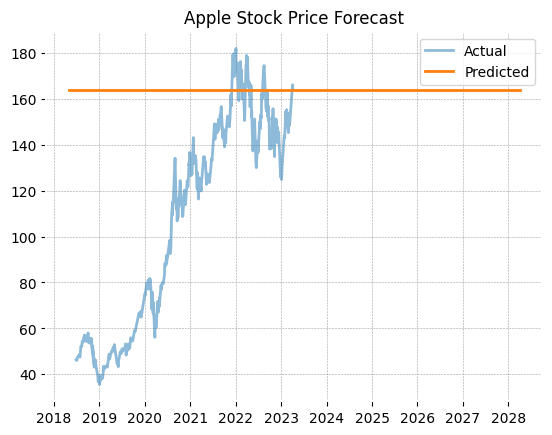

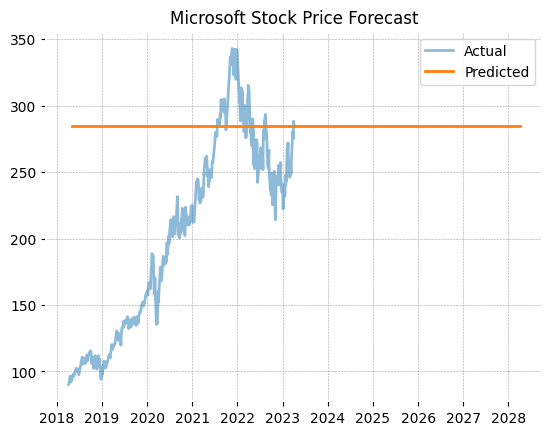

Apple RMSE score: 20.205209773858467
Microsoft RMSE score: 39.02315791539017


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Set the date column as the index of your DataFrame
data = df1.set_index('Date')

# Split the data into two separate DataFrames based on the company column
apple_data = data[data["Company"] == "Apple"]
microsoft_data = data[data["Company"] == "Microsoft"]

# Select the columns to use for forecasting
apple_column_to_use = "Close"
microsoft_column_to_use = "Close"

# Create the exponential smoothing models using the date index
apple_model = sm.tsa.SimpleExpSmoothing(apple_data[apple_column_to_use])
microsoft_model = sm.tsa.SimpleExpSmoothing(microsoft_data[microsoft_column_to_use])

# Fit the models to the data
apple_fit = apple_model.fit()
microsoft_fit = microsoft_model.fit()

# Generate the forecasts for next 3 months
next_3_months = pd.date_range(start='2018-04-06', end='2028-04-05', freq='MS')

apple_forecast = []
microsoft_forecast = []

for i in range(len(next_3_months)):
    apple_forecast.append(apple_fit.forecast(1))
    microsoft_forecast.append(microsoft_fit.forecast(1))

apple_forecast = np.array(apple_forecast).flatten()
microsoft_forecast = np.array(microsoft_forecast).flatten()

# Plot the actual and predicted values for Apple stock prices
plt.plot(apple_data[apple_column_to_use], alpha=0.5,label="Actual")
plt.plot(next_3_months, apple_forecast, label="Predicted")
plt.title("Apple Stock Price Forecast")
plt.legend()
plt.show()

# Plot the actual and predicted values for Microsoft stock prices
plt.plot(microsoft_data[microsoft_column_to_use], alpha=0.5,label="Actual")
plt.plot(next_3_months, microsoft_forecast, label="Predicted")
plt.title("Microsoft Stock Price Forecast")
plt.legend()
plt.show()

# Compute the RMSE score
apple_actual = apple_data[apple_column_to_use][-len(apple_forecast):]
microsoft_actual = microsoft_data[microsoft_column_to_use][-len(microsoft_forecast):]

apple_rmse = np.sqrt(mean_squared_error(apple_actual, apple_forecast))
microsoft_rmse = np.sqrt(mean_squared_error(microsoft_actual, microsoft_forecast))
print("Apple RMSE score:", apple_rmse)
print("Microsoft RMSE score:", microsoft_rmse)

##Simple Exponential Smoothing with Original Data

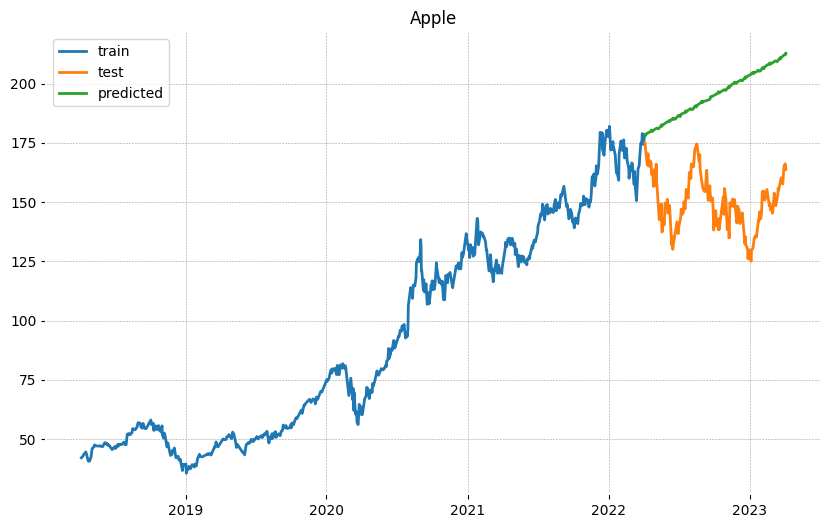

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


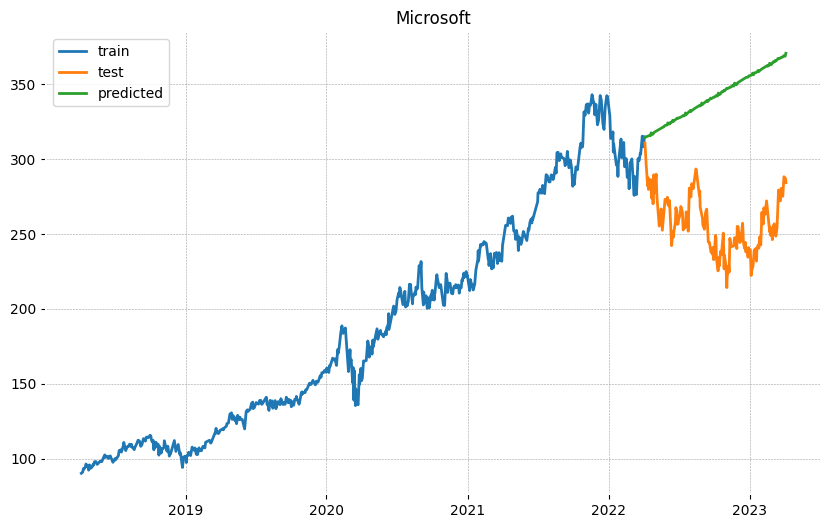

RMSE for Apple: 48.40529513241465
RMSE for Microsoft: 89.33104418521458


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.model_selection import train_test_split

# load data
data = pd.read_excel("/content/Data.xlsx")

# list of companies in the data
companies = data['Company_Name'].unique()

# dictionary to store RMSE for each company
rmse_dict = {}

# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company_Name'] == company]

    # split data into training and testing sets
    train_data, test_data = train_test_split(data_company, test_size=0.2, shuffle=False)


    # fit the model on training data
    model = ExponentialSmoothing(train_data['Close'], trend='add', seasonal='add', seasonal_periods=30)
    model_fit = model.fit()

    # make predictions on testing data
    y_pred = model_fit.forecast(len(test_data))

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Date'], train_data['Close'], label='train')
    plt.plot(test_data['Date'], test_data['Close'], label='test')
    plt.plot(test_data['Date'], y_pred, label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

# print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')


##Simple Exponential Smoothing with Scaled DataFrame

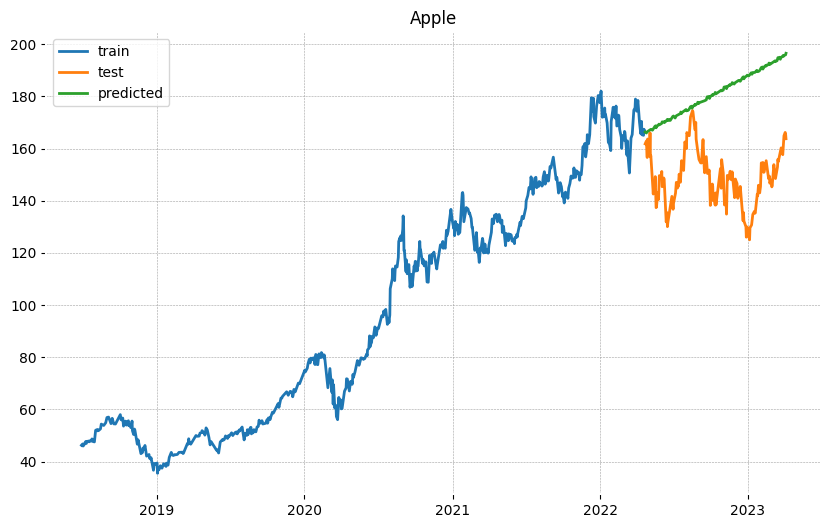

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


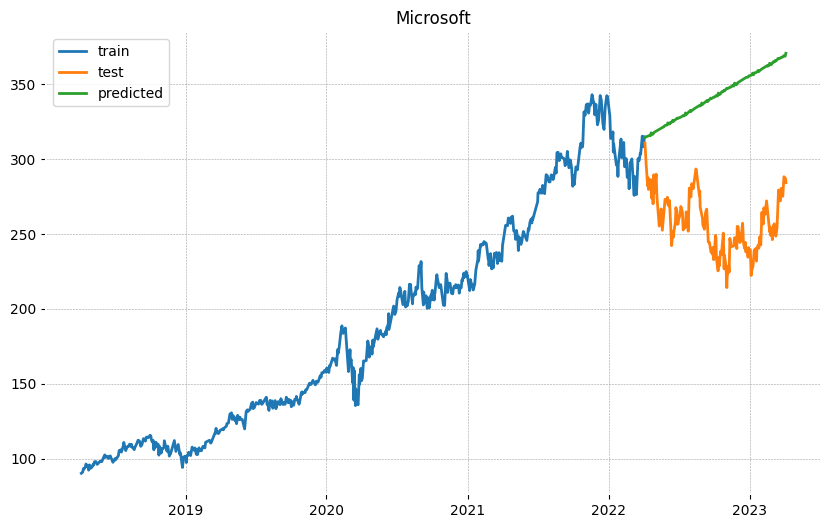

RMSE for Apple: 35.25352270416651
RMSE for Microsoft: 89.33104418521458


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.model_selection import train_test_split

# load data
data = df1[['Date', 'Company', 'Close','Open', 'High', 'Low', 'Volume', 'Adj_Close']]

# list of companies in the data
companies = data['Company'].unique()

# dictionary to store RMSE for each company
rmse_dict = {}

# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company'] == company]

    # split data into training and testing sets
    train_data, test_data = train_test_split(data_company, test_size=0.2, shuffle=False)


    # fit the model on training data
    model = ExponentialSmoothing(train_data['Close'], trend='add', seasonal='add', seasonal_periods=30)
    model_fit = model.fit()

    # make predictions on testing data
    y_pred = model_fit.forecast(len(test_data))

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Date'], train_data['Close'], label='train')
    plt.plot(test_data['Date'], test_data['Close'], label='test')
    plt.plot(test_data['Date'], y_pred, label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

# print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')


##**LSTM**

###**LSTM stands for Long Short-Term Memory, which is a type of recurrent neural network (RNN) architecture that is commonly used in deep learning for sequential data processing**

##LSTM With Actual data

Epoch 1/100
32/32 - 11s - loss: 0.0021 - val_loss: 0.0074 - 11s/epoch - 342ms/step
Epoch 2/100
32/32 - 1s - loss: 0.0012 - val_loss: 0.0019 - 930ms/epoch - 29ms/step
Epoch 3/100
32/32 - 1s - loss: 0.0014 - val_loss: 0.0060 - 719ms/epoch - 22ms/step
Epoch 4/100
32/32 - 0s - loss: 0.0028 - val_loss: 0.0226 - 418ms/epoch - 13ms/step
Epoch 5/100
32/32 - 0s - loss: 0.0028 - val_loss: 0.0106 - 436ms/epoch - 14ms/step
Epoch 6/100
32/32 - 0s - loss: 0.0014 - val_loss: 0.0039 - 410ms/epoch - 13ms/step
Epoch 7/100
32/32 - 0s - loss: 0.0015 - val_loss: 0.0025 - 418ms/epoch - 13ms/step
Epoch 8/100
32/32 - 0s - loss: 0.0011 - val_loss: 0.0022 - 442ms/epoch - 14ms/step
Epoch 9/100
32/32 - 0s - loss: 7.3382e-04 - val_loss: 0.0022 - 421ms/epoch - 13ms/step
Epoch 10/100
32/32 - 0s - loss: 5.7203e-04 - val_loss: 0.0024 - 421ms/epoch - 13ms/step
Epoch 11/100
32/32 - 0s - loss: 5.5514e-04 - val_loss: 0.0029 - 414ms/epoch - 13ms/step
Epoch 12/100
32/32 - 0s - loss: 6.0571e-04 - val_loss: 0.0036 - 420ms/epo

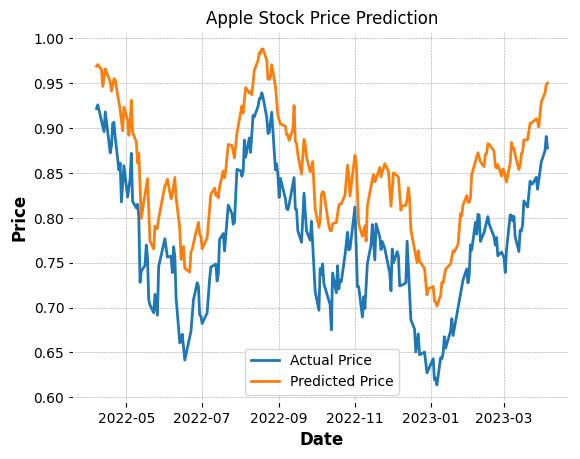

8/8 [==============================] - 1s 4ms/step


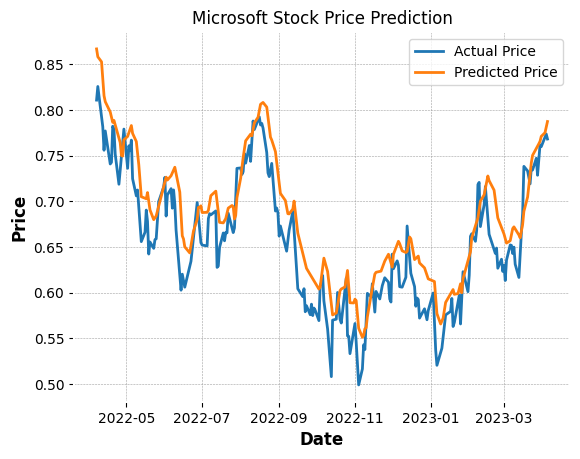

8/8 [==============================] - 0s 5ms/step
RMSE score for Apple stock price predictions: 0.08
8/8 [==============================] - 0s 5ms/step
RMSE score for Microsoft stock price predictions: 0.04


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




# Preprocess the data for Apple
df_apple = Data[Data['Company_Name'] == 'Apple']
df_apple = df_apple[['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]
scaler_apple = MinMaxScaler()
df_apple_scaled = scaler_apple.fit_transform(df_apple.iloc[:, 1:])
X_apple = []
y_apple = []
sequence_length = 10
for i in range(sequence_length, len(df_apple_scaled)):
    X_apple.append(df_apple_scaled[i-sequence_length:i, :])
    y_apple.append(df_apple_scaled[i, 0])
X_apple, y_apple = np.array(X_apple), np.array(y_apple)

# Preprocess the data for Microsoft
df_msft = Data[Data['Company_Name'] == 'Microsoft']
df_msft = df_msft[['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]
scaler_msft = MinMaxScaler()
df_msft_scaled = scaler_msft.fit_transform(df_msft.iloc[:, 1:])
X_msft = []
y_msft = []
sequence_length = 10
for i in range(sequence_length, len(df_msft_scaled)):
    X_msft.append(df_msft_scaled[i-sequence_length:i, :])
    y_msft.append(df_msft_scaled[i, 0])
X_msft, y_msft = np.array(X_msft), np.array(y_msft)

# Split the data into training and testing sets
train_size_apple = int(len(X_apple) * 0.8)
X_train_apple, X_test_apple = X_apple[:train_size_apple], X_apple[train_size_apple:]
y_train_apple, y_test_apple = y_apple[:train_size_apple], y_apple[train_size_apple:]
train_size_msft = int(len(X_msft) * 0.8)
X_train_msft, X_test_msft = X_msft[:train_size_msft], X_msft[train_size_msft:]
y_train_msft, y_test_msft = y_msft[:train_size_msft], y_msft[train_size_msft:]

# Create the LSTM model for Apple
model_apple = Sequential()
model_apple.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_apple.shape[1], X_train_apple.shape[2])))
model_apple.add(LSTM(units=50))
model_apple.add(Dense(1))
model_apple.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model for Apple
history_apple = model_apple.fit(X_train_apple, y_train_apple, epochs=100, batch_size=32, validation_data=(X_test_apple, y_test_apple), verbose=2, shuffle=False)

# Create the LSTM model for Microsoft
model_msft = Sequential()
model_msft.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_msft.shape[1], X_train_msft.shape[2])))
model_msft.add(LSTM(units=50))
model_msft.add(Dense(1))
model_msft.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model for Microsoft
history_msft = model_msft.fit(X_train_msft, y_train_msft, epochs=100, batch_size=32, validation_data=(X_test_msft, y_test_msft), verbose=2, shuffle=False)

# Predict the stock prices for Microsoft
y_pred_apple = model_apple.predict(X_test_apple)


# Reshape the predicted values to match the shape of y_test_msft
y_pred_apple = y_pred_apple.reshape(-1)

# Plot the results for Apple
plt.plot(df_apple['Date'][train_size_apple+sequence_length:], y_test_apple, label='Actual Price')
plt.plot(df_apple['Date'][train_size_apple+sequence_length:], y_pred_apple, label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict the stock prices for Microsoft
y_pred_msft = model_msft.predict(X_test_msft)


# Reshape the predicted values to match the shape of y_test_msft
y_pred_msft = y_pred_msft.reshape(-1)
# Plot the results for Microsoft
plt.plot(df_msft['Date'][train_size_msft+sequence_length:], y_test_msft, label='Actual Price')
plt.plot(df_msft['Date'][train_size_msft+sequence_length:], y_pred_msft, label='Predicted Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict the stock prices for Apple
y_pred_apple = model_apple.predict(X_test_apple)

# Reshape the predicted values to match the shape of y_test_apple
y_pred_apple = y_pred_apple.reshape(-1)

# Calculate the RMSE score for the Apple stock price predictions
rmse_apple = np.sqrt(mean_squared_error(y_test_apple, y_pred_apple))
print("RMSE score for Apple stock price predictions: {:.2f}".format(rmse_apple))

# Predict the stock prices for Microsoft
y_pred_msft = model_msft.predict(X_test_msft)

# Reshape the predicted values to match the shape of y_test_msft
y_pred_msft = y_pred_msft.reshape(-1)

# Calculate the RMSE score for the Microsoft stock price predictions
rmse_msft = np.sqrt(mean_squared_error(y_test_msft, y_pred_msft))
print("RMSE score for Microsoft stock price predictions: {:.2f}".format(rmse_msft))




##LSTM With Scaled DataFrame

Epoch 1/100
30/30 - 6s - loss: 0.0023 - val_loss: 0.0020 - 6s/epoch - 191ms/step
Epoch 2/100
30/30 - 0s - loss: 0.0033 - val_loss: 0.0105 - 399ms/epoch - 13ms/step
Epoch 3/100
30/30 - 0s - loss: 0.0022 - val_loss: 0.0106 - 387ms/epoch - 13ms/step
Epoch 4/100
30/30 - 0s - loss: 0.0017 - val_loss: 0.0014 - 411ms/epoch - 14ms/step
Epoch 5/100
30/30 - 0s - loss: 0.0032 - val_loss: 0.0026 - 393ms/epoch - 13ms/step
Epoch 6/100
30/30 - 0s - loss: 0.0015 - val_loss: 0.0072 - 398ms/epoch - 13ms/step
Epoch 7/100
30/30 - 0s - loss: 9.7675e-04 - val_loss: 0.0013 - 404ms/epoch - 13ms/step
Epoch 8/100
30/30 - 0s - loss: 0.0013 - val_loss: 0.0025 - 407ms/epoch - 14ms/step
Epoch 9/100
30/30 - 0s - loss: 9.6560e-04 - val_loss: 0.0064 - 405ms/epoch - 14ms/step
Epoch 10/100
30/30 - 0s - loss: 7.7044e-04 - val_loss: 0.0022 - 395ms/epoch - 13ms/step
Epoch 11/100
30/30 - 0s - loss: 8.2260e-04 - val_loss: 0.0026 - 423ms/epoch - 14ms/step
Epoch 12/100
30/30 - 0s - loss: 7.2055e-04 - val_loss: 0.0048 - 395ms/e

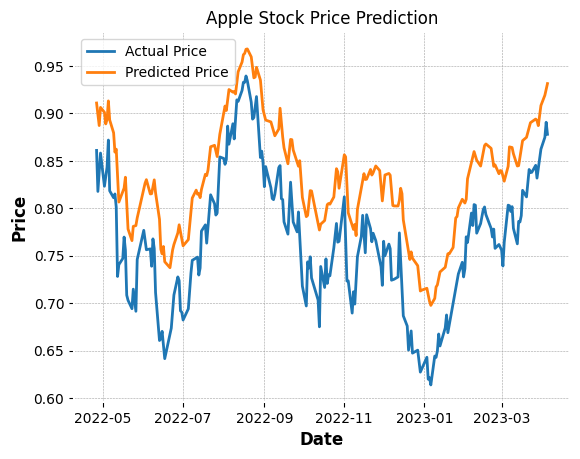

8/8 [==============================] - 1s 4ms/step


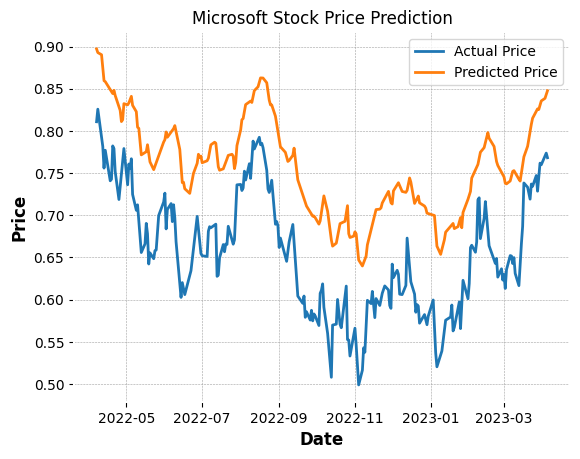

RMSE for Apple: 0.07
RMSE for Microsoft: 0.11


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




# Preprocess the data for Apple
df_apple = df1[df1['Company'] == 'Apple']
df_apple = df_apple[['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]
scaler_apple = MinMaxScaler()
df_apple_scaled = scaler_apple.fit_transform(df_apple.iloc[:, 1:])
X_apple = []
y_apple = []
sequence_length = 10
for i in range(sequence_length, len(df_apple_scaled)):
    X_apple.append(df_apple_scaled[i-sequence_length:i, :])
    y_apple.append(df_apple_scaled[i, 0])
X_apple, y_apple = np.array(X_apple), np.array(y_apple)

# Preprocess the data for Microsoft
df_msft = df1[df1['Company'] == 'Microsoft']
df_msft = df_msft[['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']]
scaler_msft = MinMaxScaler()
df_msft_scaled = scaler_msft.fit_transform(df_msft.iloc[:, 1:])
X_msft = []
y_msft = []
sequence_length = 10
for i in range(sequence_length, len(df_msft_scaled)):
    X_msft.append(df_msft_scaled[i-sequence_length:i, :])
    y_msft.append(df_msft_scaled[i, 0])
X_msft, y_msft = np.array(X_msft), np.array(y_msft)

# Split the data into training and testing sets
train_size_apple = int(len(X_apple) * 0.8)
X_train_apple, X_test_apple = X_apple[:train_size_apple], X_apple[train_size_apple:]
y_train_apple, y_test_apple = y_apple[:train_size_apple], y_apple[train_size_apple:]
train_size_msft = int(len(X_msft) * 0.8)
X_train_msft, X_test_msft = X_msft[:train_size_msft], X_msft[train_size_msft:]
y_train_msft, y_test_msft = y_msft[:train_size_msft], y_msft[train_size_msft:]

# Create the LSTM model for Apple
model_apple = Sequential()
model_apple.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_apple.shape[1], X_train_apple.shape[2])))
model_apple.add(LSTM(units=50))
model_apple.add(Dense(1))
model_apple.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model for Apple
history_apple = model_apple.fit(X_train_apple, y_train_apple, epochs=100, batch_size=32, validation_data=(X_test_apple, y_test_apple), verbose=2, shuffle=False)

# Create the LSTM model for Microsoft
model_msft = Sequential()
model_msft.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_msft.shape[1], X_train_msft.shape[2])))
model_msft.add(LSTM(units=50))
model_msft.add(Dense(1))
model_msft.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model for Microsoft
history_msft = model_msft.fit(X_train_msft, y_train_msft, epochs=100, batch_size=32, validation_data=(X_test_msft, y_test_msft), verbose=2, shuffle=False)

# Predict the stock prices for Microsoft
y_pred_apple = model_apple.predict(X_test_apple)


# Reshape the predicted values to match the shape of y_test_msft
y_pred_apple = y_pred_apple.reshape(-1)

# Plot the results for Apple
plt.plot(df_apple['Date'][train_size_apple+sequence_length:], y_test_apple, label='Actual Price')
plt.plot(df_apple['Date'][train_size_apple+sequence_length:], y_pred_apple, label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Predict the stock prices for Microsoft
y_pred_msft = model_msft.predict(X_test_msft)


# Reshape the predicted values to match the shape of y_test_msft
y_pred_msft = y_pred_msft.reshape(-1)
# Plot the results for Microsoft
plt.plot(df_msft['Date'][train_size_msft+sequence_length:], y_test_msft, label='Actual Price')
plt.plot(df_msft['Date'][train_size_msft+sequence_length:], y_pred_msft, label='Predicted Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate the RMSE for Apple
rmse_apple = np.sqrt(mean_squared_error(y_test_apple, y_pred_apple))
print(f'RMSE for Apple: {rmse_apple:.2f}')

# Calculate the RMSE for Microsoft
rmse_msft = np.sqrt(mean_squared_error(y_test_msft, y_pred_msft))
print(f'RMSE for Microsoft: {rmse_msft:.2f}')

##XGBoost with original data

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# load data
data = pd.read_excel("/content/Data.xlsx")

# list of companies in the data
companies = data['Company_Name'].unique()

In [ ]:
# dictionary to store RMSE for each company
rmse_dict = {}

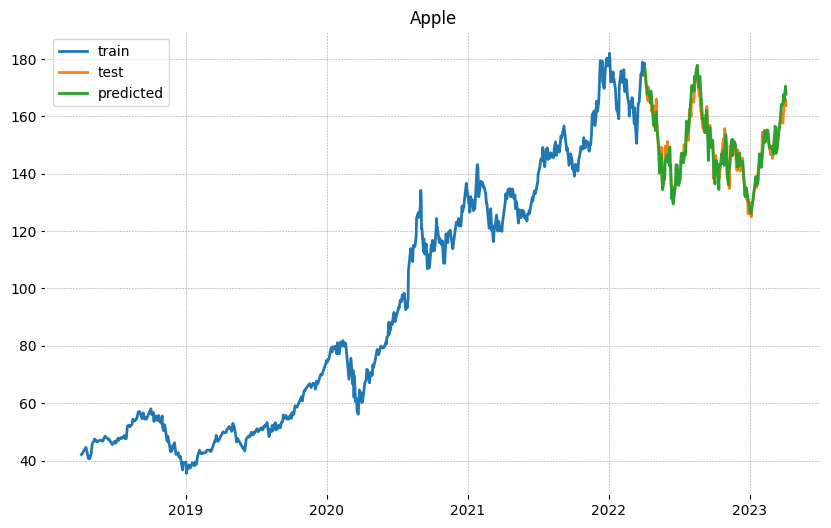

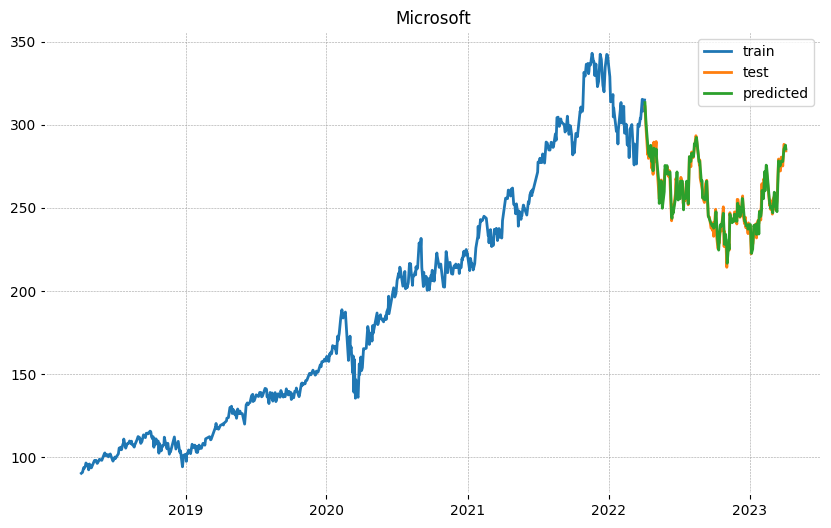

In [ ]:

# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company_Name'] == company]

    # split data into training and testing sets
    train_size = int(len(data_company) * 0.8)
    train_data, test_data = data_company[:train_size], data_company[train_size:]

    # convert data to DMatrix format for XGBoost
    train_dmatrix = xgb.DMatrix(train_data.drop(['Company_Name', 'Date', 'Close'], axis=1), label=train_data['Close'])
    test_dmatrix = xgb.DMatrix(test_data.drop(['Company_Name', 'Date', 'Close'], axis=1), label=test_data['Close'])

    # set XGBoost parameters
    params = {'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.1,
              'max_depth': 5, 'alpha': 10}

    # train the model
    model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)

    # make predictions on testing data
    y_pred = model.predict(test_dmatrix)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Date'], train_data['Close'], label='train')
    plt.plot(test_data['Date'], test_data['Close'], label='test')
    plt.plot(test_data['Date'], y_pred, label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

In [ ]:
# print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')

RMSE for Apple: 2.9617209292413404
RMSE for Microsoft: 3.3137144655489306


##XGBoost with Scaled dataframe

In [ ]:
# load data
data = df1[['Date', 'Company', 'Close','Open', 'High', 'Low', 'Volume', 'Adj_Close']]
# list of companies in the data
companies = data['Company'].unique()

In [ ]:
# dictionary to store RMSE for each company
rmse_dict = {}

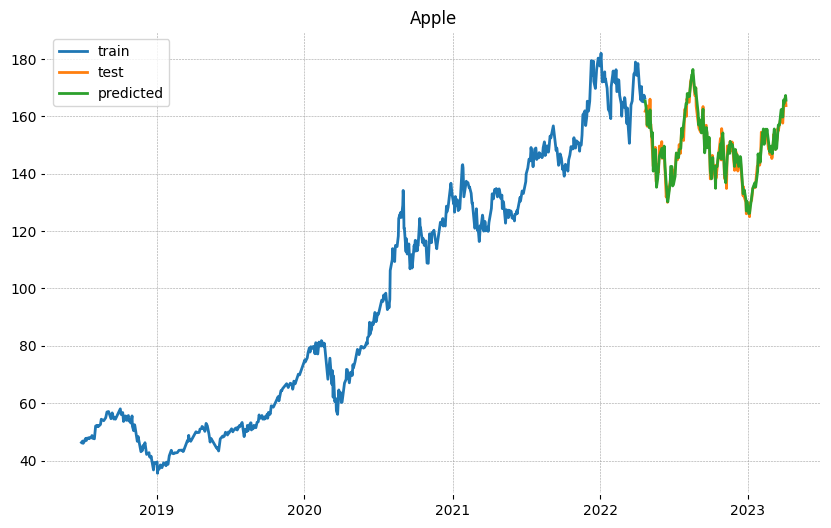

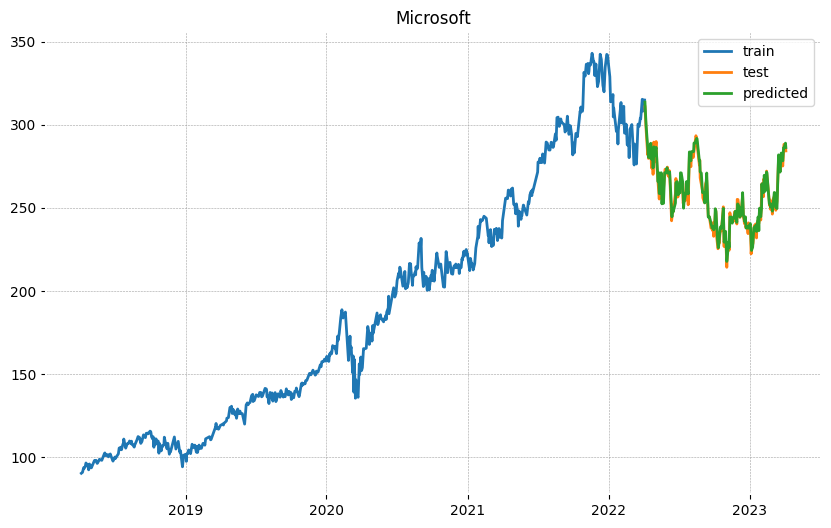

In [ ]:
# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company'] == company]

    # split data into training and testing sets
    train_size = int(len(data_company) * 0.8)
    train_data, test_data = data_company[:train_size], data_company[train_size:]

    # convert data to DMatrix format for XGBoost
    train_dmatrix = xgb.DMatrix(train_data.drop(['Company', 'Date', 'Close'], axis=1), label=train_data['Close'])
    test_dmatrix = xgb.DMatrix(test_data.drop(['Company', 'Date', 'Close'], axis=1), label=test_data['Close'])

    # set XGBoost parameters
    params = {'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.1,
              'max_depth': 5, 'alpha': 10}

    # train the model
    model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)

    # make predictions on testing data
    y_pred = model.predict(test_dmatrix)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Date'], train_data['Close'], label='train')
    plt.plot(test_data['Date'], test_data['Close'], label='test')
    plt.plot(test_data['Date'], y_pred, label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

In [ ]:
# print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')

RMSE for Apple: 2.1739139544868116
RMSE for Microsoft: 3.0391624105333004


##Moving Averages with Original Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
# load data
data = pd.read_excel('/content/Data.xlsx')
# list of companies in the data
companies = data['Company_Name'].unique()

# dictionary to store RMSE for each company
rmse_dict = {}

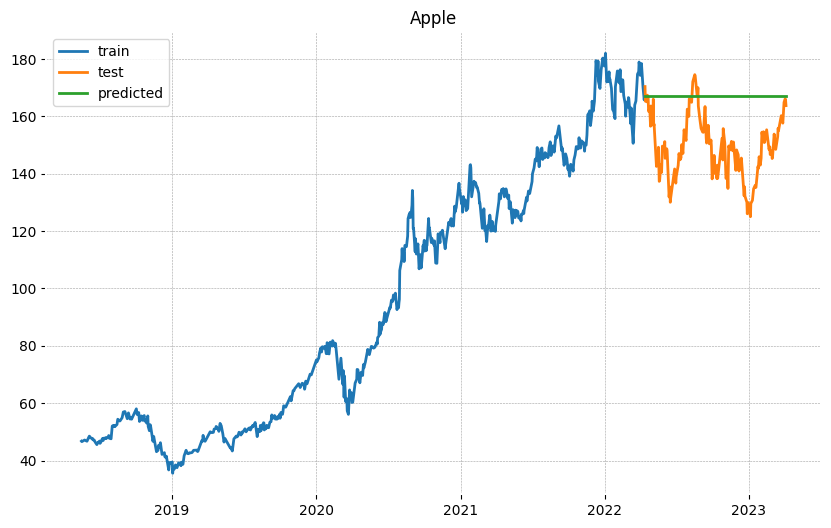

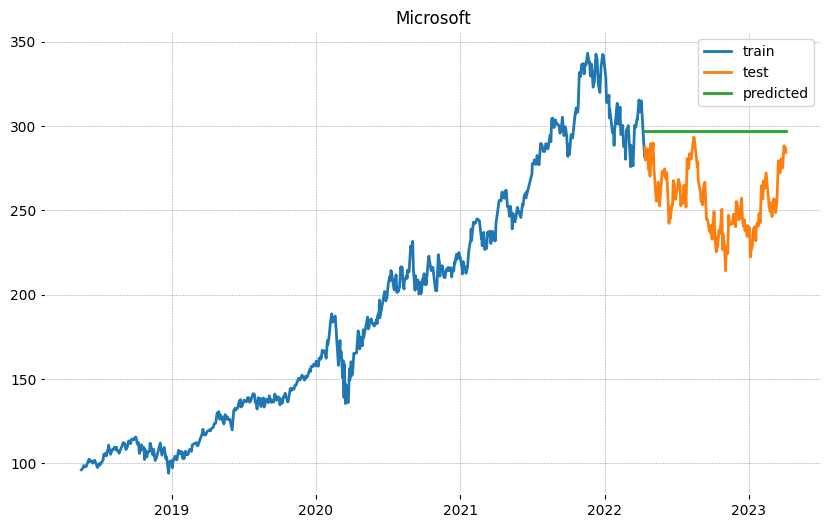

In [ ]:
# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company_Name'] == company]

    # define window size
    window_size = 30

    # calculate moving averages
    data_company['Moving_Average'] = data_company['Close'].rolling(window_size).mean()

    # remove rows with missing values
    data_company.dropna(inplace=True)

    # split data into training and testing sets
    train_size = int(len(data_company) * 0.8)
    train_data, test_data = data_company[:train_size], data_company[train_size:]

    # make predictions on testing data
    y_pred = np.repeat(train_data['Moving_Average'].iloc[-1], len(test_data))

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Date'], train_data['Close'], label='train')
    plt.plot(test_data['Date'], test_data['Close'], label='test')
    plt.plot(test_data['Date'], y_pred, label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

In [ ]:
# print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')

RMSE for Apple: 20.8502998205637
RMSE for Microsoft: 44.02948661940047


##Moving Averages with Scaled DataFrame

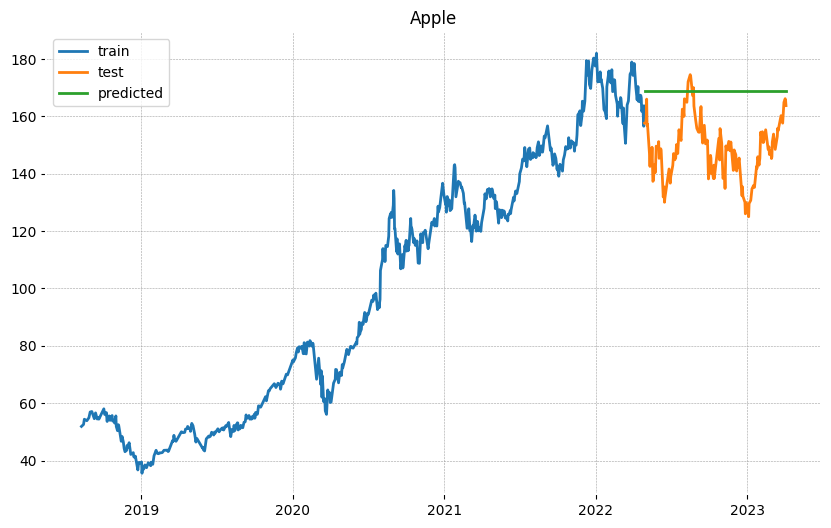

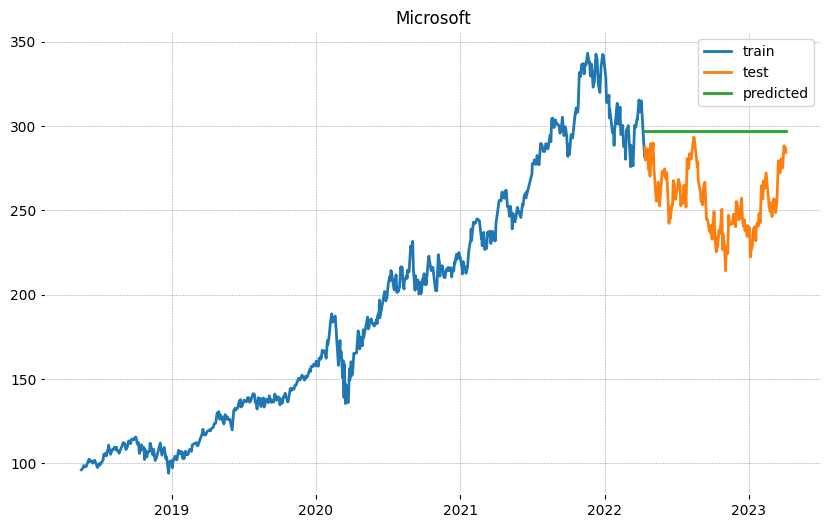

RMSE for Apple: 22.753151769513977
RMSE for Microsoft: 44.02948661940047


In [ ]:
# load data
data = df1[['Date', 'Company', 'Close','Open', 'High', 'Low', 'Volume', 'Adj_Close']]

# list of companies in the data
companies = data['Company'].unique()

# dictionary to store RMSE for each company
rmse_dict = {}

# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company'] == company]

    # define window size
    window_size = 30

    # calculate moving averages
    data_company['Moving_Average'] = data_company['Close'].rolling(window_size).mean()

    # remove rows with missing values
    data_company.dropna(inplace=True)

    # split data into training and testing sets
    train_size = int(len(data_company) * 0.8)
    train_data, test_data = data_company[:train_size], data_company[train_size:]

    # make predictions on testing data
    y_pred = np.repeat(train_data['Moving_Average'].iloc[-1], len(test_data))

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # plot future predictions
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['Date'], train_data['Close'], label='train')
    plt.plot(test_data['Date'], test_data['Close'], label='test')
    plt.plot(test_data['Date'], y_pred, label='predicted')
    plt.title(company)
    plt.legend()
    plt.show()

    # print RMSE for each company
for company, rmse in rmse_dict.items():
    print(f'RMSE for {company}: {rmse}')

##Model Deployment

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=0992395b7df8fa1c3b36897cabe4d7bd2eac3dd3164adaf8b8c2a901b9095995
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators


2023-05-05 13:48:44.449 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/ipykernel_launcher.py [ARGUMENTS]


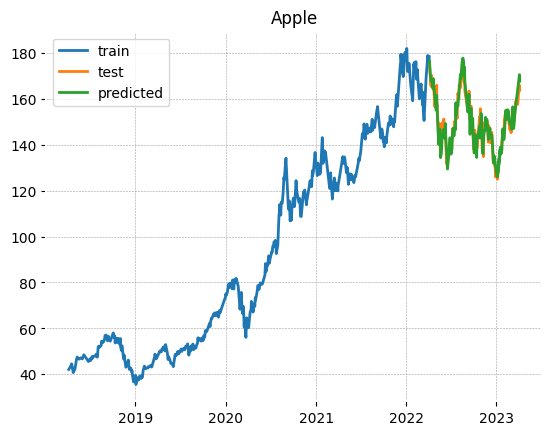

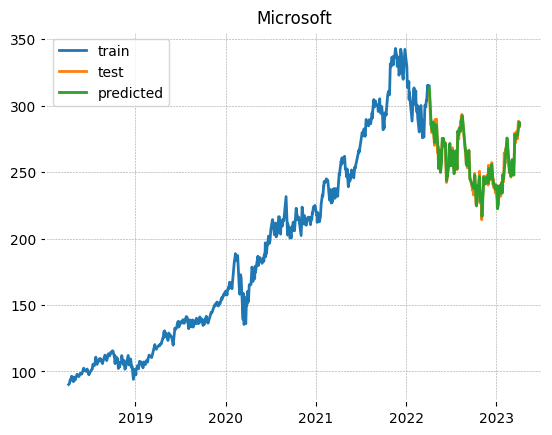

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# load data
data = pd.read_excel("/content/Data.xlsx")

# list of companies in the data
companies = data['Company_Name'].unique()

# create a dictionary to store RMSE for each company
rmse_dict = {}

# loop over companies
for company in companies:

    # extract data for the current company
    data_company = data[data['Company_Name'] == company]

    # split data into training and testing sets
    train_size = int(len(data_company) * 0.8)
    train_data, test_data = data_company[:train_size], data_company[train_size:]

    # convert data to DMatrix format for XGBoost
    train_dmatrix = xgb.DMatrix(train_data.drop(['Company_Name', 'Date', 'Close'], axis=1), label=train_data['Close'])
    test_dmatrix = xgb.DMatrix(test_data.drop(['Company_Name', 'Date', 'Close'], axis=1), label=test_data['Close'])

    # set XGBoost parameters
    params = {'objective': 'reg:squarederror', 'colsample_bytree': 0.3, 'learning_rate': 0.1,
              'max_depth': 5, 'alpha': 10}

    # train the model
    model = xgb.train(params=params, dtrain=train_dmatrix, num_boost_round=100)

    # make predictions on testing data
    y_pred = model.predict(test_dmatrix)

    # calculate RMSE
    rmse = np.sqrt(mean_squared_error(test_data['Close'], y_pred))
    rmse_dict[company] = rmse

    # visualize the results
    fig, ax = plt.subplots()
    ax.plot(train_data['Date'], train_data['Close'], label='train')
    ax.plot(test_data['Date'], test_data['Close'], label='test')
    ax.plot(test_data['Date'], y_pred, label='predicted')
    ax.set_title(company)
    ax.legend()
    st.pyplot(fig)

# create a function to predict the stock price for a given company and date
def predict_stock_price(company, date):
    data_company = data[data['Company_Name'] == company]
    data_date = data_company[data_company['Date'] == date]
    dmatrix = xgb.DMatrix(data_date.drop(['Company_Name', 'Date', 'Close'], axis=1))
    prediction = model.predict(dmatrix)
    return prediction[0]

# create a Streamlit app
st.title("Stock Price Prediction")
company = st.selectbox("Select a company", companies)
date = st.date_input("Select a date")
if st.button("Predict"):
    prediction = predict_stock_price(company, date)
    st.write("Predicted stock price:", prediction)